# **Part 1: Data scraping and preparation**

**Step 1: Scrape your competitor's data**

In [351]:
#importing necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# URL of the page to scrape
url = "https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:

    soup = BeautifulSoup(response.content, "html5lib")

    # Use prettify() to view the content and find the appropriate table
    soup.prettify()
    #print(soup.prettify())

    # Find the div element with a specific id
    div_element = soup.find("div", id="SWL_Page")

    # Find the table within the div element
    table = div_element.find("table")

    # Use Pandas to read in the HTML file
    df0 = pd.read_html(str(table))[0]

    # Rename the columns
    df0.columns = ["Rank", "X_Classification", "Date", "Region", "Start_Time", "Maximum_Time", "End_Time", "Movie"]

    # Print the DataFrame


else:
    data = {"Error Message": ["Failed to retrieve the page"], "Status Code": [response.status_code]}
    df0 = pd.DataFrame(data)





In [352]:
df0

,Rank,X_Classification,Date,Region,Start_Time,Maximum_Time,End_Time,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


**Step 2: Tidy the top 50 solar flare data**

In [353]:
# Drop the last column
df0 = df0.drop('Movie', 1)



<ipython-input-353-f4fe8055033c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df0 = df0.drop('Movie', 1)


In [354]:
df0.dtypes

Rank                 int64
X_Classification    object
Date                object
Region               int64
Start_Time          object
Maximum_Time        object
End_Time            object
dtype: object

In [355]:
# Combine the date column with the time columns to convert to datetime format
df_st = pd.to_datetime(df0['Date'] + ' ' + df0['Start_Time'])
df_mt = pd.to_datetime(df0['Date'] + ' ' + df0['Maximum_Time'])
df_et = pd.to_datetime(df0['Date'] + ' ' + df0['End_Time'])

# Add the new columns of the datetimes
df0['start_datetime'] = df_st
df0['max_datetime'] = df_mt
df0['end_datetime'] = df_et

# Drop the unwanted columns
df0 = df0.drop('Date', 1)
df0 = df0.drop('Start_Time', 1)
df0 = df0.drop('Maximum_Time', 1)
df0 = df0.drop('End_Time', 1)

<ipython-input-355-402243cf83db>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df0 = df0.drop('Date', 1)
<ipython-input-355-402243cf83db>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df0 = df0.drop('Start_Time', 1)
<ipython-input-355-402243cf83db>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df0 = df0.drop('Maximum_Time', 1)
<ipython-input-355-402243cf83db>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df0 = df0.drop('End_Time', 1)


In [356]:
# Change the order of the columns
df0 = df0[['Rank', 'X_Classification', 'start_datetime', 'max_datetime', 'end_datetime', 'Region']]

# Replace all instances of '-' with '<NA>' as stated by the prompt
df0 = df0.replace('-', '<NA>')

In [357]:
df0

,Rank,X_Classification,start_datetime,max_datetime,end_datetime,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


**Step 3: Scrape the NASA data**

In [358]:
# URL of the page to scrape
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.content, "html5lib")

    # Find the 'pre' element containing the data
    table = soup.find("pre")

    # Extract the text content of the 'pre' element
    content = table.get_text()

    # Split the content into lines
    lines = content.split('\n')

    # Remove unnecessary lines
    lines = lines[11:-3]

    # Create a DataFrame with columns
    column_names = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region',
                    'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed']

    df = pd.DataFrame(columns=column_names, index=range(len(lines)))

    # Populate the DataFrame with data
    for row_marker, line in enumerate(lines):
        cols = line.split()
        cols = [col for col in cols if col]  # Remove empty strings
        df.iloc[row_marker] = cols[:14]  # Assuming there are 14 columns

else:
    data = {"Error Message": ["Failed to retrieve the page"], "Status Code": [response.status_code]}
    df = pd.DataFrame(data)


In [359]:
df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692


In [360]:
#Replacing missing entries as NaN

df['start_frequency'] = df['start_frequency'].str.replace('\?\?\?\?','NaN')
df['end_frequency'] = df['end_frequency'].str.replace('\?\?\?\?','NaN')
df['flare_location'] = df['flare_location'].str.replace('------','NaN')
df['flare_region'] = df['flare_region'].str.replace('-----','NaN')
df['flare_classification'] = df['flare_classification'].str.replace('----','NaN')
df['cme_date'] = df['cme_date'].str.replace('--/--','NaN')
df['cme_time'] = df['cme_time'].str.replace('--:--','NaN')
df['cme_angle'] = df['cme_angle'].str.replace('----','NaN')
df['cme_width'] = df['cme_width'].str.replace('----','NaN')
df['cme_width'] = df['cme_width'].str.replace('---','NaN')
df['cme_speed'] = df['cme_speed'].str.replace('----','NaN')

<ipython-input-360-6cb9d348d073>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['start_frequency'] = df['start_frequency'].str.replace('\?\?\?\?','NaN')
<ipython-input-360-6cb9d348d073>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['end_frequency'] = df['end_frequency'].str.replace('\?\?\?\?','NaN')


In [361]:
#creating new column
df['halo_flare'] = np.where(df['cme_angle']=='Halo', 'Yes', 'No')

#Replacing 'Halo' entries as 'NA'
df['cme_angle'] = df['cme_angle'].str.replace('Halo','NA')

In [362]:
#creating column that signifies a lower bound or not
df['lower_bound'] = df.apply(lambda x: ">" in x.cme_width, axis=1)

#stripping '>' symbol from cme_width column
df['cme_width'] = df['cme_width'].map(lambda x: x.lstrip('>'))

In [363]:
#converting and combining columns to create start_datetime
df["start_datetime"] = df['start_date'] +" "+ df['start_time']
df['start_datetime'] = pd.to_datetime(df['start_datetime'])

#extract year from date and combine it to create end_datetime
df['year'] = pd.DatetimeIndex(df['start_date']).year
df['year'] = df['year'].astype(str)
df['end_time'] = df['end_time'].str.replace('24:00','23:59')
df["end_datetime"] = df['year'] + "/" + df['end_date'] + " " + df['end_time']
df['end_datetime'] = pd.to_datetime(df['end_datetime'])

#converting and combining columns to create cme_datetime FIX

#remove original date columns
df.drop('start_date', axis=1, inplace=True)
df.drop('start_time', axis=1, inplace=True)
df.drop('end_date', axis=1, inplace=True)
df.drop('end_time', axis=1, inplace=True)



#re-ordering columns /// drop year later
df = df[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency' , 'flare_location'  ,'flare_region' ,'flare_classification' ,'cme_date' ,'cme_time' ,'cme_angle'  ,'cme_width'  ,'cme_speed'  ,'halo_flare' ,'lower_bound']]



In [364]:
df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,halo_flare,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,No,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,Yes,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,Yes,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,No,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,No,False
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,NaN,NaN,09/17,12:00,NA,360,1385,Yes,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,No,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,No,False


# **Part 2: Analysis**

**Question 1: Replication**

In [365]:
#stripping letter and number of classification to order it
df['flare_classification'] = df['flare_classification'].map(lambda x: x.rstrip('.'))
df['classification_letter'] = df['flare_classification'].astype(str).str[0]
df['classification_num'] = np.where(df['flare_classification']!= 'NaN', df['flare_classification'].astype(str).str[1:], '0')
df['classification_num'] = df['classification_num'].replace(['ILA'],'0')
df['classification_num'] = pd.to_numeric(df['classification_num'])

#sorting by classification
df = df.sort_values(['classification_letter', 'classification_num'], ascending=[False, False])

<ipython-input-365-bffd324e48bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flare_classification'] = df['flare_classification'].map(lambda x: x.rstrip('.'))


In [366]:
# Store the top 50 rows of df in df_top50
df_top50 = df[['flare_classification', 'start_datetime', 'end_datetime', 'flare_region', 'halo_flare']].head(50)


In [367]:
df_top50

,flare_classification,start_datetime,end_datetime,flare_region,halo_flare
240,X28,2003-11-04 20:00:00,2003-11-04 23:59:00,10486,Yes
117,X20,2001-04-02 22:05:00,2001-04-03 02:30:00,9393,No
233,X17,2003-10-28 11:10:00,2003-10-29 23:59:00,10486,Yes
126,X14,2001-04-15 14:05:00,2001-04-16 13:00:00,9415,No
234,X10,2003-10-29 20:55:00,2003-10-29 23:59:00,10486,Yes
8,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,8100,Yes
514,X9.3,2017-09-06 12:05:00,2017-09-07 08:00:00,12673,Yes
328,X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,10930,No
237,X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,10486,Yes
515,X8.3,2017-09-10 16:02:00,2017-09-11 06:50:00,NaN,Yes


Top 50 flares of both data are not excatly the same but have relatively similar order. There is some missign data in spaceweatherlive data compare to NASA data.

**Question 2: Integration**

In [368]:

matching_rows = []
df['rank'] = np.nan

df0_new = pd.DataFrame()
df_new = pd.DataFrame()

df0_new['X_Classification'] = df0['X_Classification'].str.replace(' ', '').str.replace('+', '')
df0_new['Region'] = df0['Region'].astype(str).str.replace(' ', '').str.replace('+', '')
df0_new['Rank'] = df0['Rank'].astype(str).str.replace(' ', '').str.replace('+', '')

df_new['flare_classification'] = df['flare_classification'].str.replace(' ', '').str.replace('+', '')
df_new['flare_region'] = df['flare_region'].str.replace(' ', '').str.replace('+', '')

matching_rows = []

for  index_df0,row_df0 in df0_new.iterrows():
    for  index_df,row_df in df_new.iterrows():
      if (
            row_df0['X_Classification'] == row_df['flare_classification'] and
            row_df0['Region'] == row_df['flare_region']
        ):
            df.at[index_df, 'rank']= row_df0['Rank']
      elif(
        row_df0['X_Classification'] == row_df['flare_classification'] or
        row_df0['Region'] == row_df['flare_region']):
           df.at[index_df, 'rank']= row_df0['Rank']





<ipython-input-368-6a8509da9131>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df0_new['X_Classification'] = df0['X_Classification'].str.replace(' ', '').str.replace('+', '')
<ipython-input-368-6a8509da9131>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df0_new['Region'] = df0['Region'].astype(str).str.replace(' ', '').str.replace('+', '')
<ipython-input-368-6a8509da9131>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df0_new['Rank'] = df0['Rank'].astype(str).str.replace(' ', '').str.replace('+', '')
<ipython-inp

In [369]:


df


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,halo_flare,lower_bound,classification_letter,classification_num,rank
240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28,11/04,19:54,NA,360,2657,Yes,False,X,28.0,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20,04/02,22:06,261,244,2505,No,False,X,20.0,2
233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17,10/28,11:30,NA,360,2459,Yes,False,X,17.0,4
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14,04/15,14:06,245,167,1199,No,False,X,14.0,18
234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10,10/29,20:54,NA,360,2029,Yes,False,X,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1997-12-12 22:45:00,1997-12-12 23:20:00,14000,8000,N25W52,8116,B9.4,12/13,00:26,278,73,191,No,False,B,9.4,NaN
21,1998-05-11 21:40:00,1998-05-11 22:00:00,10000,1000,N32W90,8214,B6.6,05/11,21:55,208,301,830,No,True,B,6.6,NaN
22,1998-05-19 10:00:00,1998-05-19 11:30:00,14000,3000,N23W43,8222,B5.7,05/19,10:27,268,139,801,No,False,B,5.7,NaN
410,2013-08-06 02:01:00,2013-08-06 02:11:00,14000,11000,N27E25,EP,B4.5,08/06,02:12,48,207,441,No,False,B,4.5,NaN


As per both the datasets, Type of Flare (classification) and Region are best to determine the best matching rows.
Here it can be seen from the above table that rank of rows from 1st dataset is displayed in the last column of every row of 2nd dataset that has a matching row in 1st dataset.
First it will check if both the features are same, if they are different it will check if any one of them is same and if non of them is same, it will display "NaN"

**Question 3: Analysis**

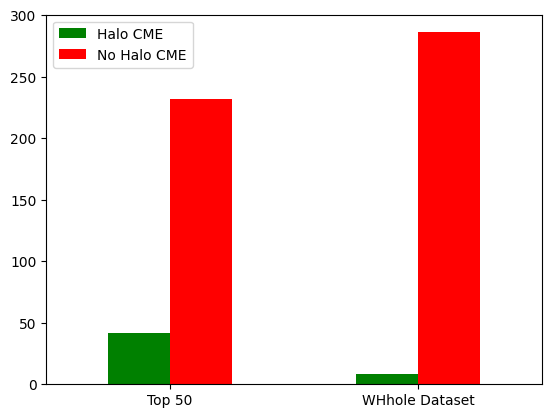

In [370]:
df['halo_flare'].value_counts(ascending=True)
Nasa_Halo = 286
Nasa_NotHalo = 232
df_top50['halo_flare'].value_counts(ascending=True)
Top50_Halo = 42
Top50_NotHalo = 8

Halo = [Top50_Halo, Top50_NotHalo]
NoHalo = [Nasa_NotHalo, Nasa_Halo]

index = ['Top 50', 'WHhole Dataset']
df2 = pd.DataFrame({'Halo CME': Halo,
                    'No Halo CME': NoHalo}, index=index)
ax = df2.plot.bar(rot=0, color={"Halo CME": "green", "No Halo CME": "red"})